In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_fit(x,y,mu,var, m_y='k-o', m_mu='b-<', l_y='true', l_mu='predicted', legend=True, title=''):
    """
    Plot the fit of a GP
    """
    if y is not None:
        plt.plot(x,y, m_y, label=l_y)
    plt.plot(x,mu, m_mu, label=l_mu)
    vv = 2*np.sqrt(var)
    plt.fill_between(x[:,0], (mu-vv)[:,0], (mu+vv)[:,0], alpha=0.2, edgecolor='gray', facecolor='cyan')
    if legend:
        plt.legend()
    if title != '':
        plt.title(title)

In [142]:
import datetime as dt
import numpy as np
import pandas as pd
import fxcmpy
from fxcmpy import fxcmpy_tick_data_reader as tdr
import tables as tb
TOKEN = '71ec67818275600cfcb24e9103f517665a313d08'
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error')
#con = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='demo')
#print(con.get_instruments())
data = con.get_candles('EUR/USD', period='m1',number=100)


#start = dt.datetime(2017, 1, 2)
#end = dt.datetime(2017, 1, 3)
#data = tdr('AUDCAD', start, end, verbosity=True)

In [143]:
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-11-15 13:24:00,1.10342,1.10333,1.10342,1.10331,1.10352,1.10344,1.10354,1.10343,172
2019-11-15 13:25:00,1.10333,1.10327,1.10335,1.10325,1.10344,1.10339,1.10346,1.10337,136
2019-11-15 13:26:00,1.10327,1.10333,1.10335,1.10327,1.10339,1.10344,1.10347,1.10339,144
2019-11-15 13:27:00,1.10333,1.10331,1.10336,1.10329,1.10344,1.10343,1.10347,1.10341,95
2019-11-15 13:28:00,1.10331,1.10331,1.10335,1.10329,1.10343,1.10343,1.10347,1.10342,64


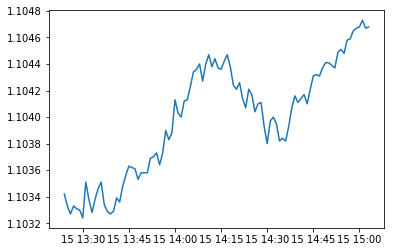

In [144]:
#
plt.plot(data['bidopen'])

In [145]:
data['bidopen'].shape

(100,)

In [146]:
ytr=np.array(data['bidopen'])
length=ytr.shape[0]
length_test=10
length_train=length-length_test
xtr=np.linspace(1,length,num=length)[:,None]
ytr=ytr[:,None]
ytr_train=ytr[0:length_train,:]
xtr_train=xtr[0:length_train,:]
ytr_test=ytr[(length_train):,:]
xtr_test=xtr[(length_train):,:]

In [147]:
#ytr_train.shape
xtr_train.shape
xtr_test.shape

(10, 1)

In [148]:
import GPy
Q = xtr_train.shape[1]
#k = RationalQuadratic(Q)
k1=GPy.kern.StdPeriodic(Q)
k2=GPy.kern.RBF(Q)
k3=GPy.kern.Linear(Q)
k4=GPy.kern.Poly(Q)

# Combining Polynomial kernal and periodic kernal

Polynomial kernal:
    $$k(x,y)=(x^T*y+c)^d$$


Periodic kernal:
    k(x,y) = $$\theta_1 \exp \left[  - \frac{1}{2} \sum_{i=1}^{input\_dim}
       \left( \frac{\sin(\frac{\pi}{T_i} (x_i - y_i) )}{l_i} \right)^2 \right]$$

 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin


Optimization restart 1/50, f = -678.3407148269156
Optimization restart 2/50, f = -303.5247129930126
Optimization restart 3/50, f = -672.4587805908035
Optimization restart 4/50, f = -679.1504383411808
Optimization restart 5/50, f = -407.1293342834199
Optimization restart 6/50, f = -365.7933491722715
Optimization restart 7/50, f = -655.5622857423907
Optimization restart 8/50, f = -653.9371856936635
Optimization restart 9/50, f = -214.3837221753229
Optimization restart 10/50, f = -265.77041720909017
Optimization restart 11/50, f = -303.4474922749179
Optimization restart 12/50, f = -249.0117280206494
Optimization restart 13/50, f = -531.3048026607895


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:invalid value encountered in reduce


Optimization restart 14/50, f = -509.8033123302939
Optimization restart 15/50, f = -126.5900116867231
Optimization restart 16/50, f = -502.9904203594823
Optimization restart 17/50, f = -395.78525087599013
Optimization restart 18/50, f = -413.3308659440955
Optimization restart 19/50, f = -379.0833966265253
Optimization restart 20/50, f = -301.03661682053894
Optimization restart 21/50, f = -253.24467815606954
Optimization restart 22/50, f = -679.1434345074532
Optimization restart 23/50, f = -236.78623348110733
Optimization restart 24/50, f = -545.4353984443422
Optimization restart 25/50, f = -175.3002233043038
Optimization restart 26/50, f = -619.0893518254564
Optimization restart 27/50, f = -175.73964488734265
Optimization restart 28/50, f = 145.3170320737083
Optimization restart 29/50, f = -253.95938117825895
Optimization restart 30/50, f = -435.57163994079406
Optimization restart 31/50, f = -636.0797210185766
Optimization restart 32/50, f = -337.22118338274976
Optimization restart 33/

GP_regression.,value,constraints,priors
sum.std_periodic.variance,0.6095283334348865,+ve,
sum.std_periodic.period,66.30402138771456,+ve,
sum.std_periodic.lengthscale,39.81617970558643,+ve,
sum.poly.variance,0.061521572393197894,+ve,
sum.poly.scale,2.1627989587143335e-06,+ve,
sum.poly.bias,0.004656764173033282,+ve,
Gaussian_noise.variance,2.5648318052218834e-18,+ve,


 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


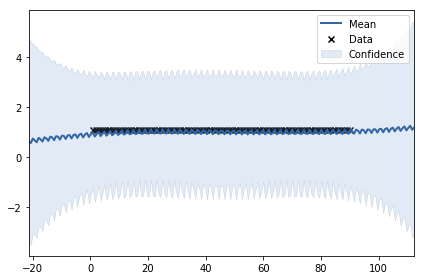

In [149]:
k=k1+k4 #polynomial kernal and periodic kernal
m = GPy.models.GPRegression(X=xtr_train, Y=ytr_train, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 50, messages=False)
display(m)

{'dataplot': [<matplotlib.collections.PathCollection at 0x1a23a595c0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a23a59630>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a228aa978>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


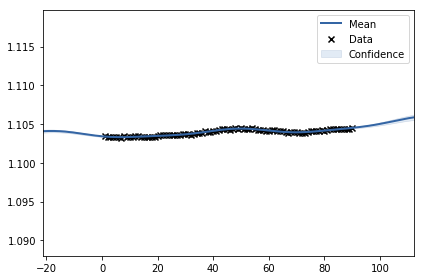

In [150]:
m.plot()

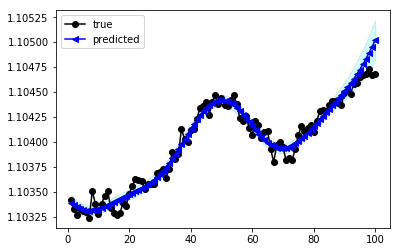

In [151]:
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
plot_fit(xtr, ytr, mu, var)


Name : GP regression
Objective : -687.4251263926628
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.std_periodic.variance     |      0.6095283334348865  |      +ve      |        
  sum.std_periodic.period       |       66.30402138771456  |      +ve      |        
  sum.std_periodic.lengthscale  |       39.81617970558643  |      +ve      |        
  sum.poly.variance             |    0.061521572393197894  |      +ve      |        
  sum.poly.scale                |  2.1627989587143335e-06  |      +ve      |        
  sum.poly.bias                 |    0.004656764173033282  |      +ve      |        
  Gaussian_noise.variance       |  2.5648318052218834e-18  |      +ve      |        


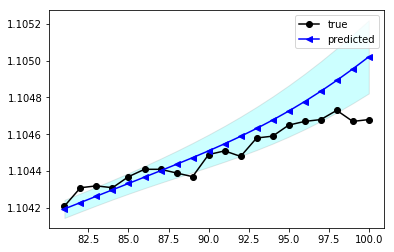

In [152]:
print(m)
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
plot_fit(xtr[80:,:], ytr[80:,:], mu[80:,:], var[80:,:])

In [156]:
def RMSE(model, xpred, ypred):
    mu, V = model.predict(xpred)
    Sqerr = np.power(ypred - mu,2)
    MSE = np.sum(Sqerr)
    rmse = np.sqrt(MSE/ypred.size)
    print ('RMSE = ' +str(rmse))
    print ('Log likelihood is ' + str(model.log_likelihood()))
    return rmse
RMSE(m,xtr_test,ytr_test)


RMSE = 0.0001698562951067563
Log likelihood is 687.4251263926628


0.0001698562951067563

In [157]:
#X_extrap=np.linspace(0,200,200)[:,None]
#mu,var = m.predict(X_extrap)
#plot_fit(X_extrap, None, mu, var)


# RBF Kernal


$$k(r) = \sigma^2 \exp \bigg(- \frac{1}{2} r^2 \bigg)$$

Optimization restart 1/50, f = -663.9854072486554
Optimization restart 2/50, f = -663.9854107003158
Optimization restart 3/50, f = -662.3991122061029
Optimization restart 4/50, f = -663.9854107289962
Optimization restart 5/50, f = -663.9852931932147
Optimization restart 6/50, f = -663.9854088911098
Optimization restart 7/50, f = -663.9854107444429


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square


Optimization restart 8/50, f = -663.9854104659845
Optimization restart 9/50, f = -663.9854106796465
Optimization restart 10/50, f = -663.9854100187077
Optimization restart 11/50, f = -663.9854110710737
Optimization restart 12/50, f = -663.9849843334986
Optimization restart 13/50, f = -663.9853161061066
Optimization restart 14/50, f = -663.9854111764388
Optimization restart 15/50, f = -663.9854098615182
Optimization restart 16/50, f = -663.9852705744491
Optimization restart 17/50, f = -663.2572746804278
Optimization restart 18/50, f = 136.602347635383
Optimization restart 19/50, f = -658.5245954527404
Optimization restart 20/50, f = -663.9854109803267
Optimization restart 21/50, f = -663.9853920321721
Optimization restart 22/50, f = -663.9854107664127
Optimization restart 23/50, f = -646.4250582160953


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 24/50, f = -663.98529371962
Optimization restart 25/50, f = 136.60234763529039
Optimization restart 26/50, f = -663.985409280025
Optimization restart 27/50, f = 136.60234763538278
Optimization restart 28/50, f = -663.9854106666698
Optimization restart 29/50, f = -663.985410677342
Optimization restart 30/50, f = -661.5460720042212
Optimization restart 31/50, f = -663.9854015847765
Optimization restart 32/50, f = -663.9852427077288
Optimization restart 33/50, f = -663.9854109087578
Optimization restart 34/50, f = -663.9853844613792
Optimization restart 35/50, f = -663.9854111878503
Optimization restart 36/50, f = -663.9854110051375
Optimization restart 37/50, f = -663.9854092027765
Optimization restart 38/50, f = -663.9854106972421
Optimization restart 39/50, f = -663.9854107987228
Optimization restart 40/50, f = -663.9854073912148
Optimization restart 41/50, f = -663.9854042001276
Optimization restart 42/50, f = 136.60234763538287
Optimization restart 43/50, f = -66

GP_regression.,value,constraints,priors
rbf.variance,0.5947591278042939,+ve,
rbf.lengthscale,56.46546244715756,+ve,
Gaussian_noise.variance,3.8988449751621533e-20,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a2285d780>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a265a05c0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a23c1a1d0>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


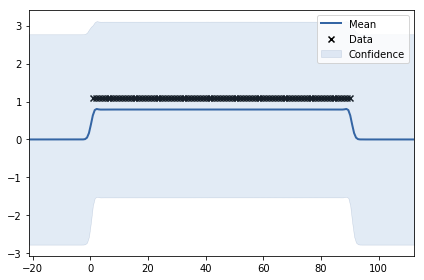

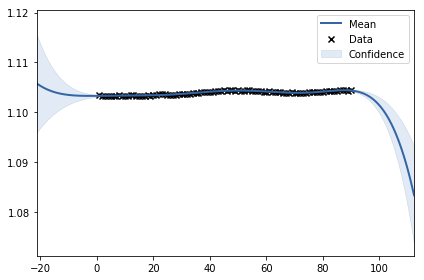

In [158]:
k=k2
m = GPy.models.GPRegression(X=X_star, Y=Y_star, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 50, messages=False)
display(m)
m.plot() #after optimization


Name : GP regression
Objective : -663.9854111878503
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.5947591278042939  |      +ve      |        
  rbf.lengthscale          |       56.46546244715756  |      +ve      |        
  Gaussian_noise.variance  |  3.8988449751621533e-20  |      +ve      |        


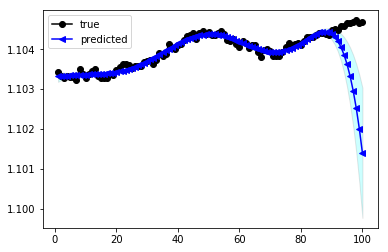

In [160]:
print(m)
mu,var = m.predict(xtr)
plot_fit(xtr, ytr, mu, var)


Name : GP regression
Objective : -663.9854111878503
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.5947591278042939  |      +ve      |        
  rbf.lengthscale          |       56.46546244715756  |      +ve      |        
  Gaussian_noise.variance  |  3.8988449751621533e-20  |      +ve      |        


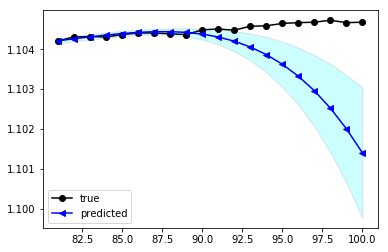

In [161]:
print(m)
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
plot_fit(xtr[80:,:], ytr[80:,:], mu[80:,:], var[80:,:])

In [162]:
#X_extrap=np.linspace(1,200,200)[:,None]
#mu,var = m.predict(X_extrap)
#plot_fit(X_extrap, None, mu, var)

# Combine RBF kernal and Polynomial kernal

 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/50, f = -692.2724975325609
Optimization restart 2/50, f = -679.1254314462202
Optimization restart 3/50, f = -693.0708769189437


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:168: 

Optimization restart 4/50, f = -564.9998955701333
Optimization restart 5/50, f = -688.6143896389177
Optimization restart 6/50, f = -507.4916625812875


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin


Optimization restart 7/50, f = -679.1505206877346
Optimization restart 8/50, f = -568.1287492415399
Optimization restart 9/50, f = -691.5119884071526
Optimization restart 10/50, f = -679.1505208375073
Optimization restart 11/50, f = -610.1030706638566
Optimization restart 12/50, f = -547.8313263012506
Optimization restart 13/50, f = -692.2985462812736
Optimization restart 14/50, f = -663.9854100989779
Optimization restart 15/50, f = -596.2720978004584
Optimization restart 16/50, f = -568.1304251120571
Optimization restart 17/50, f = -641.3948456566347
Optimization restart 18/50, f = -670.8554690534418
Optimization restart 19/50, f = -455.3444073114319
Optimization restart 20/50, f = -683.3832684633066
Optimization restart 21/50, f = -679.1505209386726
Optimization restart 22/50, f = -568.1274497745667
Optimization restart 23/50, f = -626.3327983993593
Optimization restart 24/50, f = -609.5532129499956
Optimization restart 25/50, f = -668.1997722606468
Optimization restart 26/50, f = -5

GP_regression.,value,constraints,priors
sum.rbf.variance,2.1964985595149407e-07,+ve,
sum.rbf.lengthscale,15.340768030320277,+ve,
sum.std_periodic.variance,1.219730699941301,+ve,
sum.std_periodic.period,13.583574351262879,+ve,
sum.std_periodic.lengthscale,26754.444804716746,+ve,
Gaussian_noise.variance,5.562684646268137e-309,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a23b5a828>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a26050748>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a319fe320>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


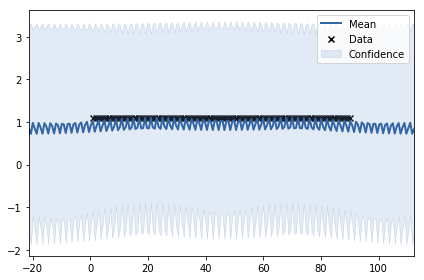

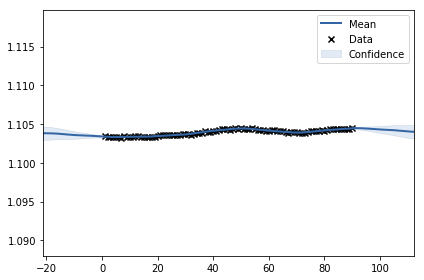

In [178]:
k=k2+k1
m = GPy.models.GPRegression(X=X_star, Y=Y_star, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 50, messages=False)
display(m)
m.plot() #after optimization


Name : GP regression
Objective : -693.0708769189437
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.rbf.variance              |  2.1964985595149407e-07  |      +ve      |        
  sum.rbf.lengthscale           |      15.340768030320277  |      +ve      |        
  sum.std_periodic.variance     |       1.219730699941301  |      +ve      |        
  sum.std_periodic.period       |      13.583574351262879  |      +ve      |        
  sum.std_periodic.lengthscale  |      26754.444804716746  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


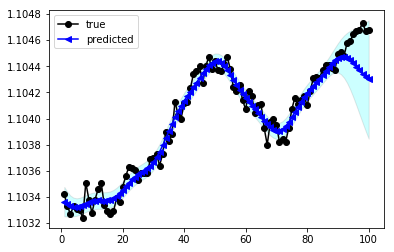

In [179]:
print(m)
mu,var = m.predict(xtr)
plot_fit(xtr, ytr, mu, var)

In [180]:
def RMSE(model, xpred, ypred):
    mu, V = model.predict(xpred)
    Sqerr = np.power(ypred - mu,2)
    MSE = np.sum(Sqerr)
    rmse = np.sqrt(MSE/ypred.size)
    print ('RMSE = ' +str(rmse))
    print ('Log likelihood is ' + str(model.log_likelihood()))
    return rmse
RMSE(m,xtr_test,ytr_test)

RMSE = 0.0002600270598474067
Log likelihood is 693.0708769189437


0.0002600270598474067


Name : GP regression
Objective : -693.0708769189437
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.rbf.variance              |  2.1964985595149407e-07  |      +ve      |        
  sum.rbf.lengthscale           |      15.340768030320277  |      +ve      |        
  sum.std_periodic.variance     |       1.219730699941301  |      +ve      |        
  sum.std_periodic.period       |      13.583574351262879  |      +ve      |        
  sum.std_periodic.lengthscale  |      26754.444804716746  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


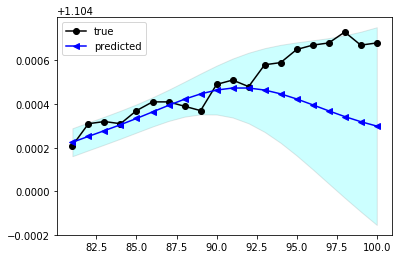

In [181]:
print(m)
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
plot_fit(xtr[80:,:], ytr[80:,:], mu[80:,:], var[80:,:])

In [166]:
#X_extrap=np.linspace(1,200,200)[:,None]
#mu,var = m.predict(X_extrap)
#plot_fit(X_extrap, None, mu, var)

# Combine linear kernal and periodic kernal

The linear kernal is defined as:
$$k(x,y) = \sum_{i=1}^{\text{input_dim}} \sigma^2_i x_iy_i$$

Optimization restart 1/50, f = -663.8418392218839
Optimization restart 2/50, f = -658.6030431054796
Optimization restart 3/50, f = -610.9349191779926
Optimization restart 4/50, f = -486.43170944604117
Optimization restart 5/50, f = -471.44919743951937


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:131: RuntimeWarning:overflow encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:invalid value encountered in sin


Optimization restart 6/50, f = -610.9349033262802
Optimization restart 7/50, f = -552.2062165056127


 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:invalid value encountered in true_divide
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply
 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/standard_periodic.py:168: 

Optimization restart 8/50, f = -623.4407863085088
Optimization restart 9/50, f = -555.4573307917531
Optimization restart 10/50, f = -610.9349147676019
Optimization restart 11/50, f = -455.4172362792423
Optimization restart 12/50, f = -457.01558970205053
Optimization restart 13/50, f = -459.12435060134385
Optimization restart 14/50, f = -444.7597674049549
Optimization restart 15/50, f = -610.9349031948334
Optimization restart 16/50, f = -648.4080650763475
Optimization restart 17/50, f = -647.8221774549795
Optimization restart 18/50, f = -647.4762216679028
Optimization restart 19/50, f = -606.3301950592086
Optimization restart 20/50, f = -680.4994490977656
Optimization restart 21/50, f = -579.0536943054485
Optimization restart 22/50, f = -638.0650224076118
Optimization restart 23/50, f = -628.061528903879
Optimization restart 24/50, f = -537.5498574136321
Optimization restart 25/50, f = -610.9348892321343
Optimization restart 26/50, f = -643.2658921345482
Optimization restart 27/50, f = 

GP_regression.,value,constraints,priors
sum.linear.variances,1.8108363111622143e-10,+ve,
sum.std_periodic.variance,0.6054575765022822,+ve,
sum.std_periodic.period,85.67363250933275,+ve,
sum.std_periodic.lengthscale,28.943613156634257,+ve,
Gaussian_noise.variance,2.2687189778814884e-19,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a2b419ba8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a2b4ab2b0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a2b4ab518>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


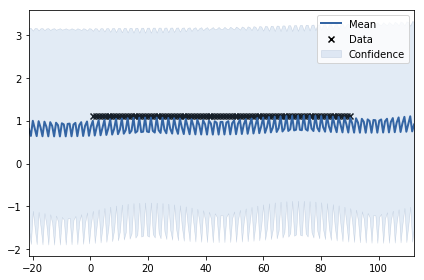

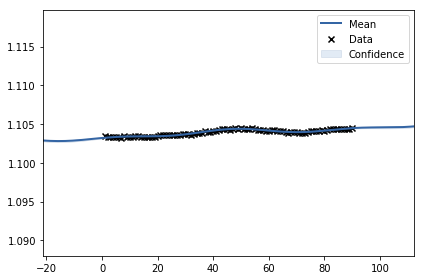

In [176]:
k=k3+k1
m = GPy.models.GPRegression(X=X_star, Y=Y_star, kernel=k)
m.plot() #before optimization
m.optimize(messages=False)
m.optimize_restarts(num_restarts = 50, messages=False)
display(m)
m.plot() #after optimization

In [177]:
def RMSE(model, xpred, ypred):
    mu, V = model.predict(xpred)
    Sqerr = np.power(ypred - mu,2)
    MSE = np.sum(Sqerr)
    rmse = np.sqrt(MSE/ypred.size)
    print ('RMSE = ' +str(rmse))
    print ('Log likelihood is ' + str(model.log_likelihood()))
    return rmse
RMSE(m,xtr_test,ytr_test)

RMSE = 9.640854480696039e-05
Log likelihood is 681.9215463350993


9.640854480696039e-05


Name : GP regression
Objective : -681.9215464723393
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.linear.variances          |   1.810833806838579e-10  |      +ve      |        
  sum.std_periodic.variance     |      0.6054525260729067  |      +ve      |        
  sum.std_periodic.period       |      0.5029351798322736  |      +ve      |        
  sum.std_periodic.lengthscale  |      28.943510336790833  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


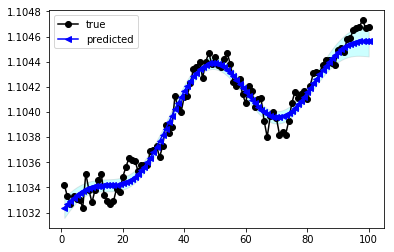

In [168]:
print(m)
mu,var = m.predict(xtr)
plot_fit(xtr, ytr, mu, var)


Name : GP regression
Objective : -681.9215464723393
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.linear.variances          |   1.810833806838579e-10  |      +ve      |        
  sum.std_periodic.variance     |      0.6054525260729067  |      +ve      |        
  sum.std_periodic.period       |      0.5029351798322736  |      +ve      |        
  sum.std_periodic.lengthscale  |      28.943510336790833  |      +ve      |        
  Gaussian_noise.variance       |  5.562684646268137e-309  |      +ve      |        


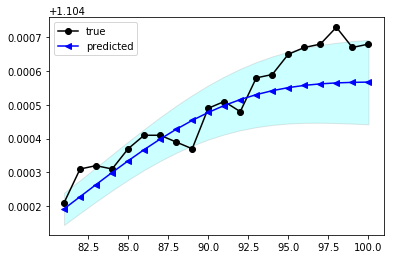

In [170]:
print(m)
X_star=xtr_train
Y_star=ytr_train
mu,var = m.predict(xtr)
plot_fit(xtr[80:,:], ytr[80:,:], mu[80:,:], var[80:,:])

In [171]:
#X_extrap=np.linspace(1,200,200)[:,None]
#mu,var = m.predict(X_extrap)
#plot_fit(X_extrap, None, mu, var)